This example notebook uses the averaging functions found ins the diff_classifier msd module to find average msd profiles over input msd datasets using precision-weighted averaging. Precision is the inverse of the standard squared error. This increases the contribution of videos that have many particles and more homogeneous datasets to the final calculated MSD.

In [1]:
import numpy as np
import diff_classifier.aws as aws
import diff_classifier.msd as msd

In [2]:
folder = 'Gel_Studies/11_21_18_coverage'
bucket = 'ccurtis.data'
#experiment = 'test' #Used for naming purposes. Should exclude XY and well information

#vids = 2
to_track = []
labels = []
frames = 651
fps = 100.02
umppx = 0.07

vids = 20
gels = ['PSCOOH', 'p0_1', 'p0_2', 'p0_4', 'p0_5', 'p0_6', 'p0_75', 'p1']
for gel in gels:
    for num in range(1, vids+1):
        #to_track.append('100x_0_4_1_2_gel_{}_bulk_vid_{}'.format(vis, num))
        to_track.append('{}_XY{}'.format(gel, '%02d' % num))

to_track

['PSCOOH_XY01',
 'PSCOOH_XY02',
 'PSCOOH_XY03',
 'PSCOOH_XY04',
 'PSCOOH_XY05',
 'PSCOOH_XY06',
 'PSCOOH_XY07',
 'PSCOOH_XY08',
 'PSCOOH_XY09',
 'PSCOOH_XY10',
 'PSCOOH_XY11',
 'PSCOOH_XY12',
 'PSCOOH_XY13',
 'PSCOOH_XY14',
 'PSCOOH_XY15',
 'PSCOOH_XY16',
 'PSCOOH_XY17',
 'PSCOOH_XY18',
 'PSCOOH_XY19',
 'PSCOOH_XY20',
 'p0_1_XY01',
 'p0_1_XY02',
 'p0_1_XY03',
 'p0_1_XY04',
 'p0_1_XY05',
 'p0_1_XY06',
 'p0_1_XY07',
 'p0_1_XY08',
 'p0_1_XY09',
 'p0_1_XY10',
 'p0_1_XY11',
 'p0_1_XY12',
 'p0_1_XY13',
 'p0_1_XY14',
 'p0_1_XY15',
 'p0_1_XY16',
 'p0_1_XY17',
 'p0_1_XY18',
 'p0_1_XY19',
 'p0_1_XY20',
 'p0_2_XY01',
 'p0_2_XY02',
 'p0_2_XY03',
 'p0_2_XY04',
 'p0_2_XY05',
 'p0_2_XY06',
 'p0_2_XY07',
 'p0_2_XY08',
 'p0_2_XY09',
 'p0_2_XY10',
 'p0_2_XY11',
 'p0_2_XY12',
 'p0_2_XY13',
 'p0_2_XY14',
 'p0_2_XY15',
 'p0_2_XY16',
 'p0_2_XY17',
 'p0_2_XY18',
 'p0_2_XY19',
 'p0_2_XY20',
 'p0_4_XY01',
 'p0_4_XY02',
 'p0_4_XY03',
 'p0_4_XY04',
 'p0_4_XY05',
 'p0_4_XY06',
 'p0_4_XY07',
 'p0_4_XY08',
 'p0_4_X

In [3]:
experiment = 'cover'
slices, bins, well_names = msd.binning(to_track, wells = 8, prefix=experiment)

In [4]:
geomean = {}
gSEM = {}
for sample_name in to_track:
    # Users can toggle between using pre-calculated geomean files and calculating new values by commenting out the relevant
    # lines of code within the for loop.
    aws.download_s3('{}/geomean_{}.csv'.format(folder, sample_name), 'geomean_{}.csv'.format(sample_name), bucket_name=bucket)
    aws.download_s3('{}/geoSEM_{}.csv'.format(folder, sample_name), 'geoSEM_{}.csv'.format(sample_name), bucket_name=bucket)
    geomean[sample_name] = np.genfromtxt('geomean_{}.csv'.format(sample_name))
    gSEM[sample_name] = np.genfromtxt('geoSEM_{}.csv'.format(sample_name))
    
    #aws.download_s3('{}/msd_{}.csv'.format(folder, sample_name), 'msd_{}.csv'.format(sample_name), bucket_name=bucket)
    #geomean[sample_name], gSEM[sample_name] = msd.geomean_msdisp(sample_name, umppx=umppx, fps=fps,
    #                                                             remote_folder=folder, bucket=bucket)
    print('Done with {}'.format(sample_name))

Done with PSCOOH_XY01
Done with PSCOOH_XY02
Done with PSCOOH_XY03
Done with PSCOOH_XY04
Done with PSCOOH_XY05
Done with PSCOOH_XY06
Done with PSCOOH_XY07
Done with PSCOOH_XY08
Done with PSCOOH_XY09
Done with PSCOOH_XY10
Done with PSCOOH_XY11
Done with PSCOOH_XY12
Done with PSCOOH_XY13
Done with PSCOOH_XY14
Done with PSCOOH_XY15
Done with PSCOOH_XY16
Done with PSCOOH_XY17
Done with PSCOOH_XY18
Done with PSCOOH_XY19
Done with PSCOOH_XY20
Done with p0_1_XY01
Done with p0_1_XY02
Done with p0_1_XY03
Done with p0_1_XY04
Done with p0_1_XY05
Done with p0_1_XY06
Done with p0_1_XY07
Done with p0_1_XY08
Done with p0_1_XY09
Done with p0_1_XY10
Done with p0_1_XY11
Done with p0_1_XY12
Done with p0_1_XY13
Done with p0_1_XY14
Done with p0_1_XY15
Done with p0_1_XY16
Done with p0_1_XY17
Done with p0_1_XY18
Done with p0_1_XY19
Done with p0_1_XY20
Done with p0_2_XY01
Done with p0_2_XY02
Done with p0_2_XY03
Done with p0_2_XY04
Done with p0_2_XY05
Done with p0_2_XY06
Done with p0_2_XY07
Done with p0_2_XY08


In [5]:
exps = []
for typ in gels:
    to_avg = []
    for sample in to_track:
        combi = '{}'.format(typ)
        if combi in sample:
            to_avg.append(sample)

    weights, wh1 = msd.precision_weight(to_avg, gSEM)
    geodata = msd.precision_averaging(to_avg, geomean, gSEM, weights,
                                      bucket=bucket, folder=folder, experiment=typ)
    exps.append(typ)

/home/ubuntu/source/diff-classifier/diff_classifier/msd.py:609: RuntimeWarning: divide by zero encountered in true_divide
  w_holder[video_counter, :] = 1/(geo_stder[sample]*geo_stder[sample])
/home/ubuntu/source/diff-classifier/diff_classifier/msd.py:656: RuntimeWarning: divide by zero encountered in true_divide
  w_holder[video_counter, :] = (1/(geo_stder[sample]*geo_stder[sample])
/home/ubuntu/source/diff-classifier/diff_classifier/msd.py:660: RuntimeWarning: divide by zero encountered in true_divide
  gstder_holder[video_counter, :] = 1/(geo_stder[sample]*geo_stder[sample]


Note that in cases where two or more averaging steps are needed (for instance, if the user takes 5 videos per well with a total of four wells), averaging steps can be performed consecutively. the msd.binning function is a helpful tool by defining bins over which to average for multi-step averaging.

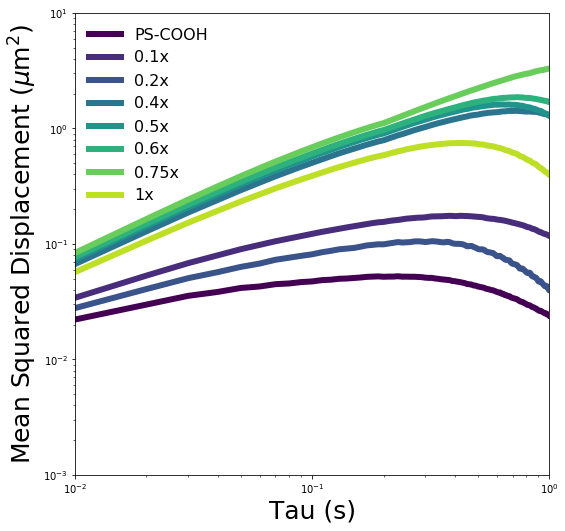

In [7]:
msd.plot_all_experiments(gels,
                         yrange=(10**-3, 10**1), bucket=bucket, folder=folder,
                         labels = ['PS-COOH', '0.1x', '0.2x', '0.4x', '0.5x', '0.6x', '0.75x', '1x'])

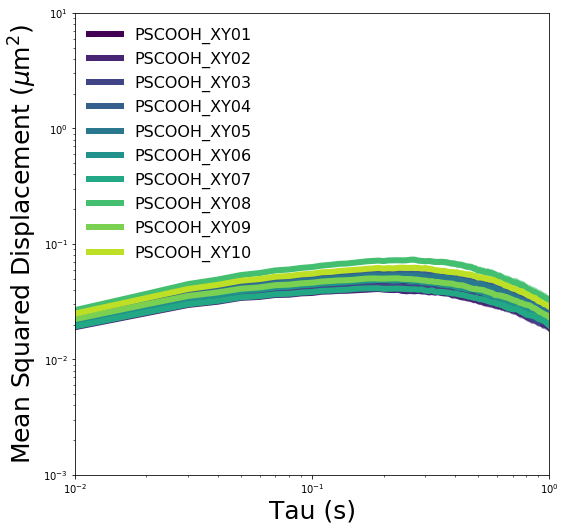

In [3]:
msd.plot_all_experiments(to_track[0:10], yrange=(10**-3, 10**1), bucket=bucket, folder=folder)

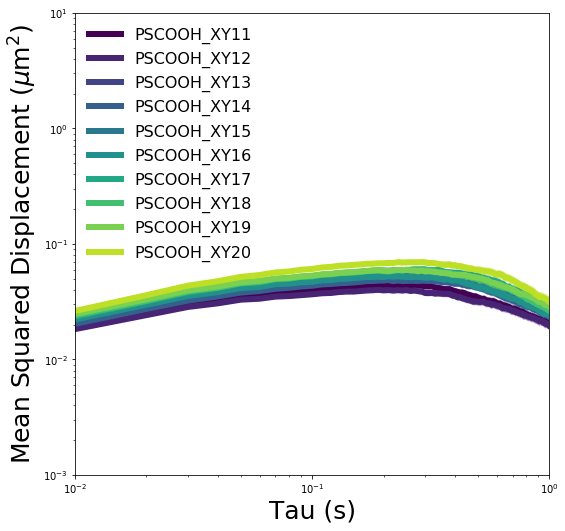

In [4]:
msd.plot_all_experiments(to_track[10:20], yrange=(10**-3, 10**1), bucket=bucket, folder=folder)

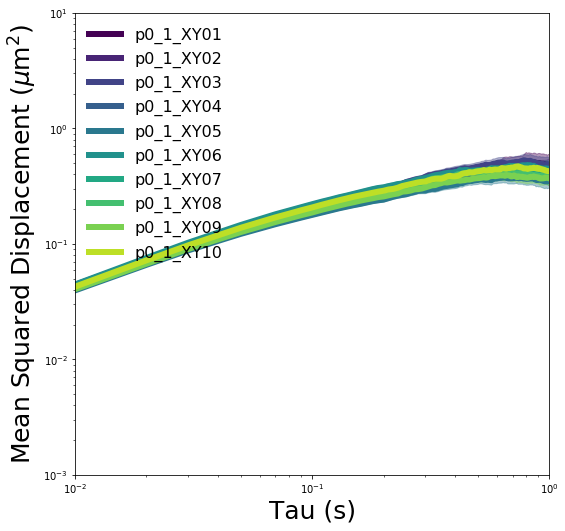

In [5]:
msd.plot_all_experiments(to_track[20:30], yrange=(10**-3, 10**1), bucket=bucket, folder=folder)

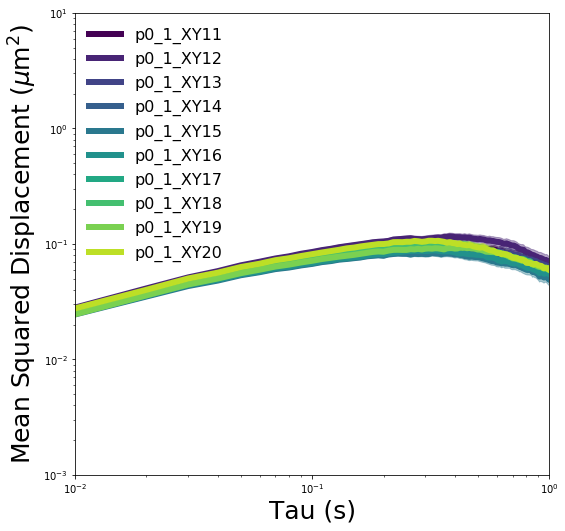

In [6]:
msd.plot_all_experiments(to_track[30:40], yrange=(10**-3, 10**1), bucket=bucket, folder=folder)

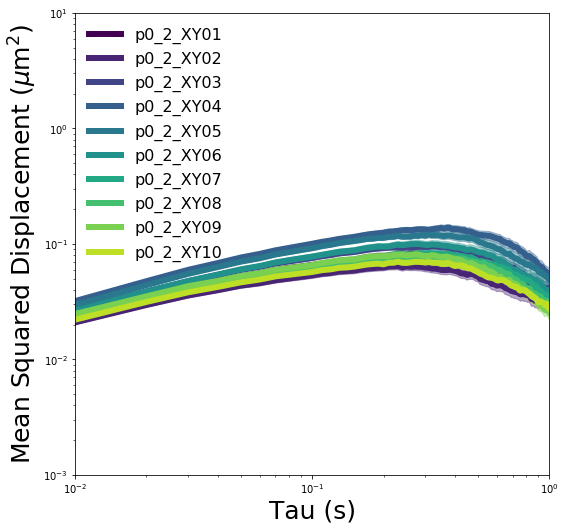

In [7]:
msd.plot_all_experiments(to_track[40:50], yrange=(10**-3, 10**1), bucket=bucket, folder=folder)

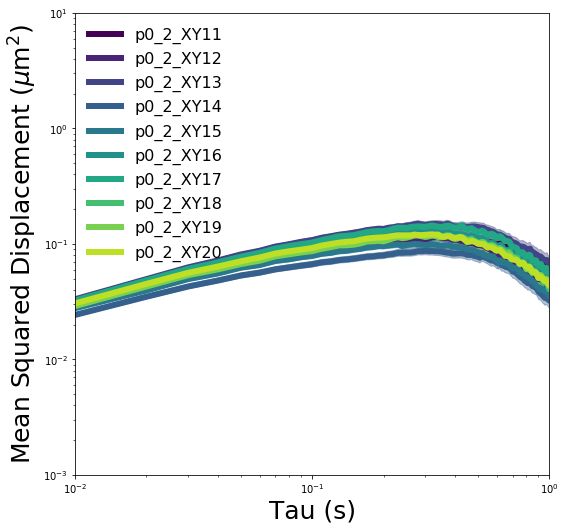

In [8]:
msd.plot_all_experiments(to_track[50:60], yrange=(10**-3, 10**1), bucket=bucket, folder=folder)

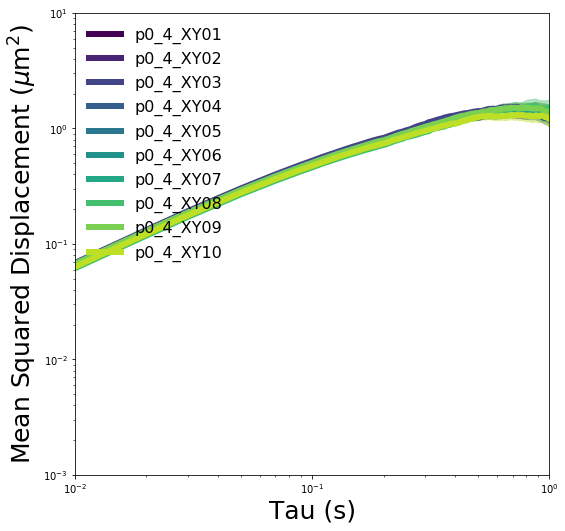

In [9]:
msd.plot_all_experiments(to_track[60:70], yrange=(10**-3, 10**1), bucket=bucket, folder=folder)

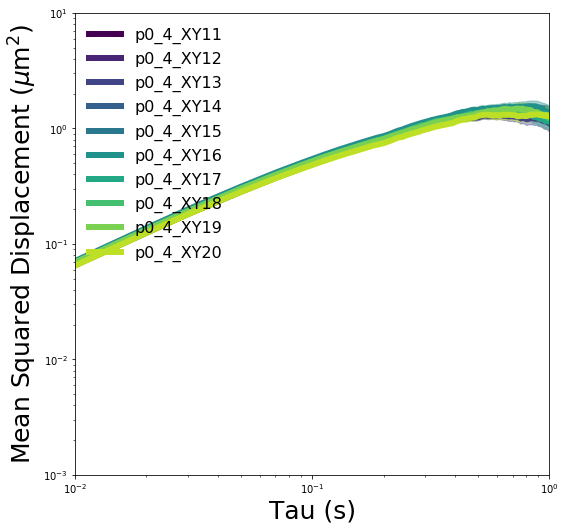

In [10]:
msd.plot_all_experiments(to_track[70:80], yrange=(10**-3, 10**1), bucket=bucket, folder=folder)

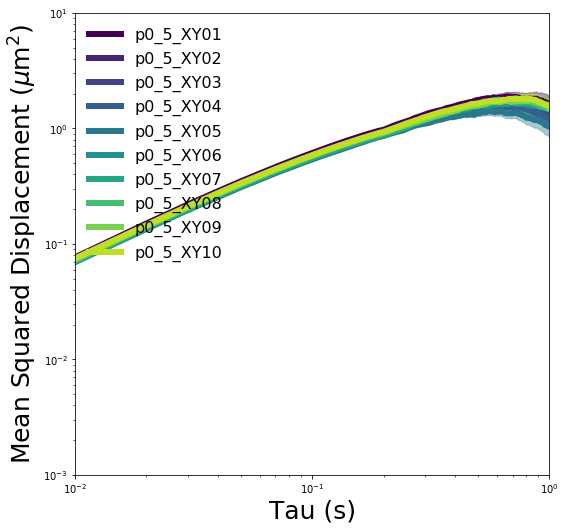

In [11]:
msd.plot_all_experiments(to_track[80:90], yrange=(10**-3, 10**1), bucket=bucket, folder=folder)

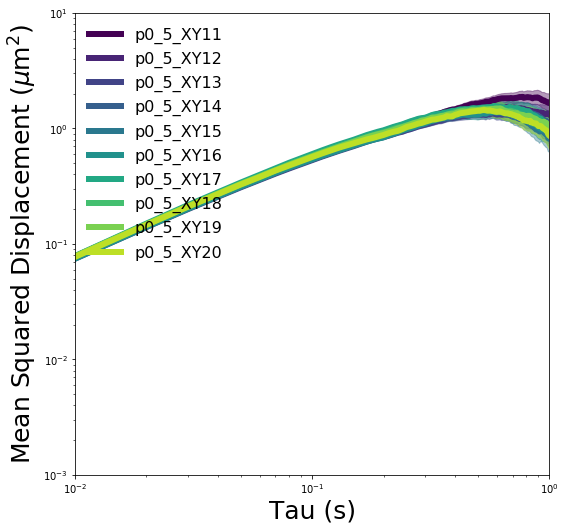

In [12]:
msd.plot_all_experiments(to_track[90:100], yrange=(10**-3, 10**1), bucket=bucket, folder=folder)

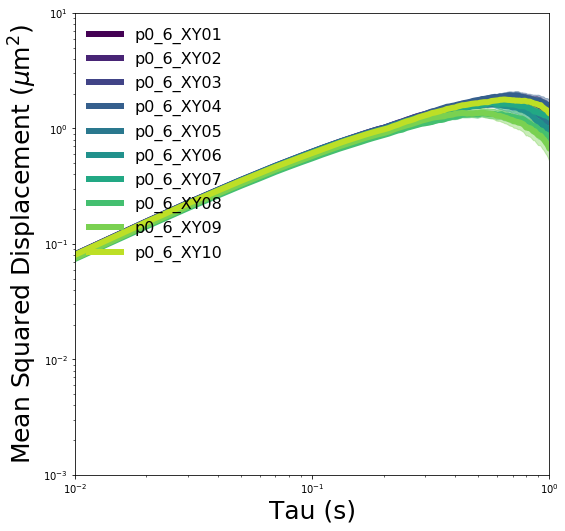

In [13]:
msd.plot_all_experiments(to_track[100:110], yrange=(10**-3, 10**1), bucket=bucket, folder=folder)

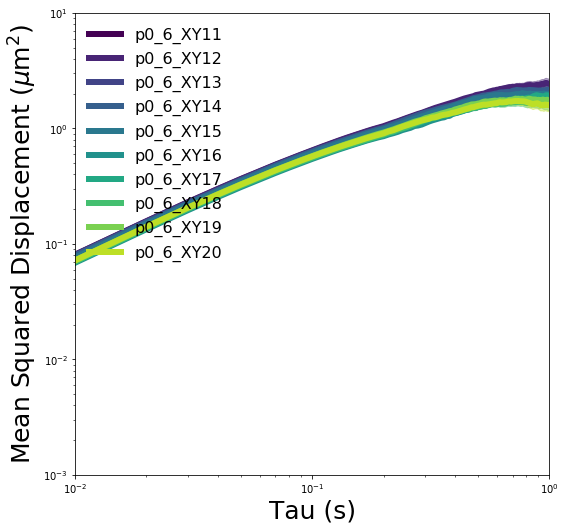

In [14]:
msd.plot_all_experiments(to_track[110:120], yrange=(10**-3, 10**1), bucket=bucket, folder=folder)

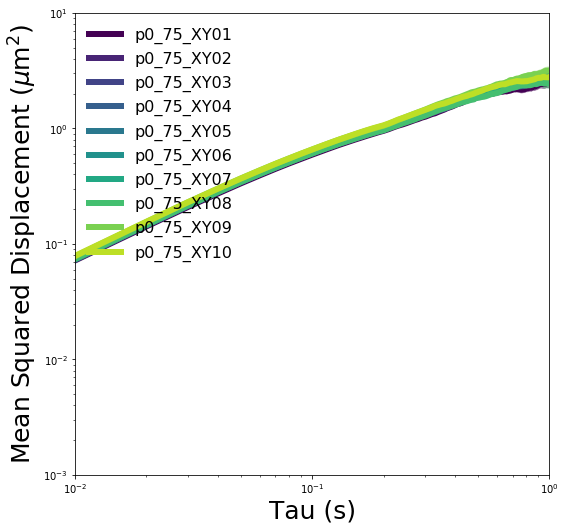

In [15]:
msd.plot_all_experiments(to_track[120:130], yrange=(10**-3, 10**1), bucket=bucket, folder=folder)

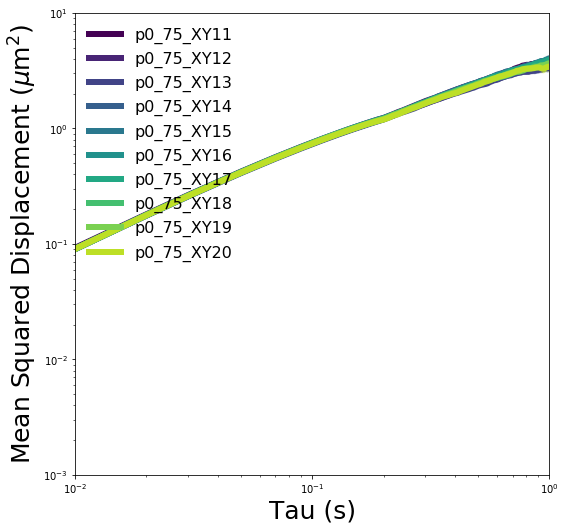

In [18]:
msd.plot_all_experiments(to_track[130:140], yrange=(10**-3, 10**1), bucket=bucket, folder=folder)

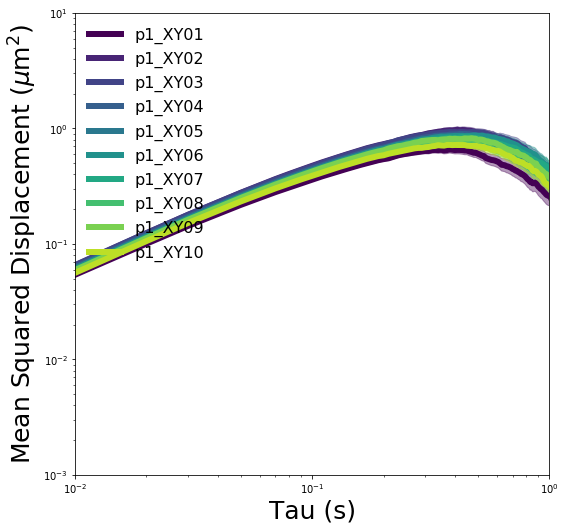

In [16]:
msd.plot_all_experiments(to_track[140:150], yrange=(10**-3, 10**1), bucket=bucket, folder=folder)

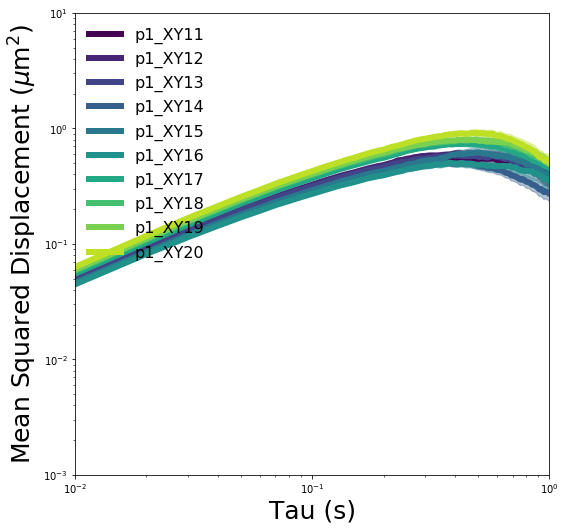

In [17]:
msd.plot_all_experiments(to_track[150:160], yrange=(10**-3, 10**1), bucket=bucket, folder=folder)